# Helper Functions

In [ ]:
import os
root_path = '/raid/ee-mariyam/maryam/abhijeet/Combined_Files'
def get_jpg_paths(base_dir):
    jpg_dict = {}
    
    for folder_name in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder_name)
        
        if os.path.isdir(folder_path):
            jpg_paths = []
            
            for file_name in os.listdir(folder_path):
                if file_name.lower().endswith('.jpg'):
                    file_path = os.path.join(folder_path, file_name)
                    jpg_paths.append(file_path)
            
            if jpg_paths:
                jpg_dict[folder_name] = jpg_paths
    
    return jpg_dict

combined_files_path = root_path
jpg_paths_dict = get_jpg_paths(combined_files_path)


In [57]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets, models
from torch.utils.data import DataLoader, random_split
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F 
import cv2
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [58]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [59]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [ ]:
def evaluate_model(model, val_loader):
    model.eval()
    all_labels = []
    all_preds = []
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_preds = np.array(all_preds)
    return all_labels, all_preds



In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, num_classes, class_names):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=class_names,
                yticklabels=class_names)
    
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()


In [ ]:
def plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies):

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss', color='blue')
    plt.plot(val_losses, label='Validation Loss', color='orange')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy', color='green')
    plt.plot(val_accuracies, label='Validation Accuracy', color='red')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_classwise_accuracy(cm, jpg_paths_dict):
    total_accuracy = np.trace(cm) / np.sum(cm)

    classwise_accuracy = cm.diagonal() / cm.sum(axis=1)

    class_names = list(jpg_paths_dict.keys())  
    classwise_accuracy = [
        acc if cm.sum(axis=1)[i] > 0 else np.nan
        for i, acc in enumerate(classwise_accuracy)
    ]

    print(f"Total Accuracy: {total_accuracy * 100:.2f}%")
    for i, accuracy in enumerate(classwise_accuracy):
        if np.isnan(accuracy):
            print(f"Class '{class_names[i]}' Accuracy: N/A (no samples)")
        else:
            print(f"Class '{class_names[i]}' Accuracy: {accuracy * 100:.2f}%")

    plt.figure(figsize=(10, 6))
    plt.bar(class_names, classwise_accuracy, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Class-wise Accuracy')
    plt.ylim(0, 1)  
    plt.axhline(total_accuracy, color='red', linestyle='--', label='Total Accuracy')
    plt.xticks(rotation=45)  
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()  
    plt.show()

In [64]:
jpg_paths_comb_dict = jpg_paths_dict.copy()
anthra = jpg_paths_comb_dict['Anthracnose']
twist = jpg_paths_comb_dict['Twister']
antra_twist = anthra+twist
jpg_paths_comb_dict['Antracnose_Twister'] = antra_twist

jpg_paths_comb_dict.pop('Anthracnose', None)
jpg_paths_comb_dict.pop('Twister', None)


['/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3185.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3244.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6556.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094620957.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 14.11.2023 DSC_6553.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 25.10.2023 IMG_20231025_094709204.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 06.10.2023 DSC_3270.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/D E6 17.11.2023 DSC_6919.JPG',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 06.10.2023 IMG_20231006_163321~2.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S E6 07.10.2023 IMG20231007113350.jpg',
 '/raid/ee-mariyam/maryam/abhijeet/Combined_Files/Twister/S 

In [65]:
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    print(f"Subfolder: {subfolder}")
    print(f"Number of JPEG files: {len(jpg_files)}")
    print()

Subfolder: Purple_Blotch
Number of JPEG files: 406

Subfolder: Thrips
Number of JPEG files: 546

Subfolder: IYSV
Number of JPEG files: 754

Subfolder: Healthy
Number of JPEG files: 1072

Subfolder: Bulb Rot
Number of JPEG files: 669

Subfolder: Basal_Rot
Number of JPEG files: 140

Subfolder: Stemphylium
Number of JPEG files: 661

Subfolder: Antracnose_Twister
Number of JPEG files: 1082



In [ ]:

from torch.utils.data import Dataset, DataLoader

class CustomImageDataset(Dataset):
    def __init__(self, jpg_files_dict, transform=None):
        self.transform = transform
        self.image_paths = []
        self.labels = []
        self.label_map = {}
        self._prepare_data(jpg_files_dict)

        self.default_transform = transforms.Compose([
            transforms.ToTensor(),  
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def _prepare_data(self, jpg_files_dict):
        for label_idx, (subfolder, file_paths) in enumerate(jpg_files_dict.items()):
            self.label_map[subfolder] = label_idx
            for file_path in file_paths:
                self.image_paths.append(file_path)
                self.labels.append(label_idx)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        try:
            image = Image.open(img_path).convert('RGB')
        except (OSError, IOError) as e:
            print(f'Error loading image {img_path}: {e}')
            image = Image.new('RGB', (224, 224))
            label = self.labels[idx]
        else:
            label = self.labels[idx]

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


## New

In [ ]:
from PIL import Image
import numpy as np
import cv2

class BalancedDataset(CustomImageDataset):
    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            image = cv2.imread(img_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is None or image.size == 0:
                raise ValueError("Invalid image")
        except Exception:
            image = np.zeros((224, 224, 3), dtype=np.uint8)  

        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)
        else:
            image = self.default_transform(image)

        return image, label


In [ ]:
def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
        
    batch_size = x.size()[0]
    index = torch.randperm(batch_size).to(x.device)
    
    mixed_x = lam * x + (1 - lam) * x[index]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam

def mixup_loss(pred, y_a, y_b, lam, criterion):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


In [ ]:
class DenseNet121WithCBAM(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.base = models.densenet121(pretrained=True)
        self.features = self.base.features
        
        self.cbam1 = CBAM(1024)
        self.cbam2 = CBAM(1024)
        
        self.classifier = nn.Linear(1024, num_classes)
        
    def forward(self, x):
        features = self.features(x)
        features = self.cbam1(features)
        features = F.relu(features)
        features = self.cbam2(features)
        out = F.adaptive_avg_pool2d(features, (1, 1))
        out = torch.flatten(out, 1)
        return self.classifier(out)


In [ ]:
class CBAM(nn.Module):
    def __init__(self, channels, reduction_ratio=16):
        super().__init__()
        self.channel_attention = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(channels, channels//reduction_ratio, 1),
            nn.ReLU(),
            nn.Conv2d(channels//reduction_ratio, channels, 1),
            nn.Sigmoid()
        )
        
        self.spatial_attention = nn.Sequential(
            nn.Conv2d(channels, 1, 7, padding=3),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        channel = self.channel_attention(x)
        x = x * channel
        spatial = self.spatial_attention(x)
        return x * spatial


In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = BalancedDataset(jpg_files_dict=jpg_paths_comb_dict, transform=transform)


In [72]:

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=32, num_workers=64)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=64)

In [73]:

import numpy as np
import torch
class_counts = []
for subfolder, jpg_files in jpg_paths_comb_dict.items():
    class_counts.append(len(jpg_files))
def compute_class_weights(label_map, dataset):
    print(class_counts)
    class_weights = np.max(class_counts) / class_counts
    class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
    print(class_weights)
    return class_weights

class_weights = compute_class_weights(dataset.label_map, dataset)
criterion = nn.CrossEntropyLoss(weight=class_weights)


[406, 546, 754, 1072, 669, 140, 661, 1082]
tensor([2.6650, 1.9817, 1.4350, 1.0093, 1.6173, 7.7286, 1.6369, 1.0000],
       device='cuda:0')


In [74]:
def validate(model, val_loader, criterion):
    model.eval()
    val_running_loss = 0.0
    val_corrects = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_corrects += (predicted == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = val_corrects / val_total
    return val_loss, val_acc


In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
def train_model_enhanced(model, train_loader, val_loader, criterion, optimizer, num_epochs=20):
    scheduler = ReduceLROnPlateau(optimizer, 'max', patience=3, factor=0.5, verbose=True)
    best_acc = 0.0
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        corrects = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            inputs, targets_a, targets_b, lam = mixup_data(inputs, labels, alpha=0.4)
            
            optimizer.zero_grad()
            
            outputs = model(inputs)
            loss = mixup_loss(outputs, targets_a, targets_b, lam, criterion)
            
            loss.backward()
            optimizer.step()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            corrects += (lam * (predicted == targets_a).sum().item() + 
                        (1 - lam) * (predicted == targets_b).sum().item())
            
            running_loss += loss.item() * inputs.size(0)
        
        val_loss, val_acc = validate(model, val_loader, criterion)
        train_loss = running_loss / len(train_loader.dataset)
        train_acc = corrects / total
        
        scheduler.step(val_acc)
        
        if val_acc > best_acc:
            best_acc = val_acc
            torch.save(model.state_dict(), 'densenet_cutmix_cbam_no_annotation.pth')
        
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print(f'Epoch {epoch+1}: '
              f'Train Loss: {running_loss/len(train_loader.dataset):.4f} '
              f'Train Acc: {corrects/total:.4f} '
              f'Val Loss: {val_loss:.4f} Val Acc: {val_acc:.4f}')
    
    return train_losses, train_accuracies, val_losses, val_accuracies, model


In [76]:

model = DenseNet121WithCBAM(num_classes=len(jpg_paths_comb_dict)).to(device)

In [77]:
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=1e-4)

train_losses, train_accuracies, val_losses, val_accuracies, model = train_model_enhanced(model, train_loader, val_loader, criterion, optimizer, num_epochs=50)

KeyboardInterrupt: 

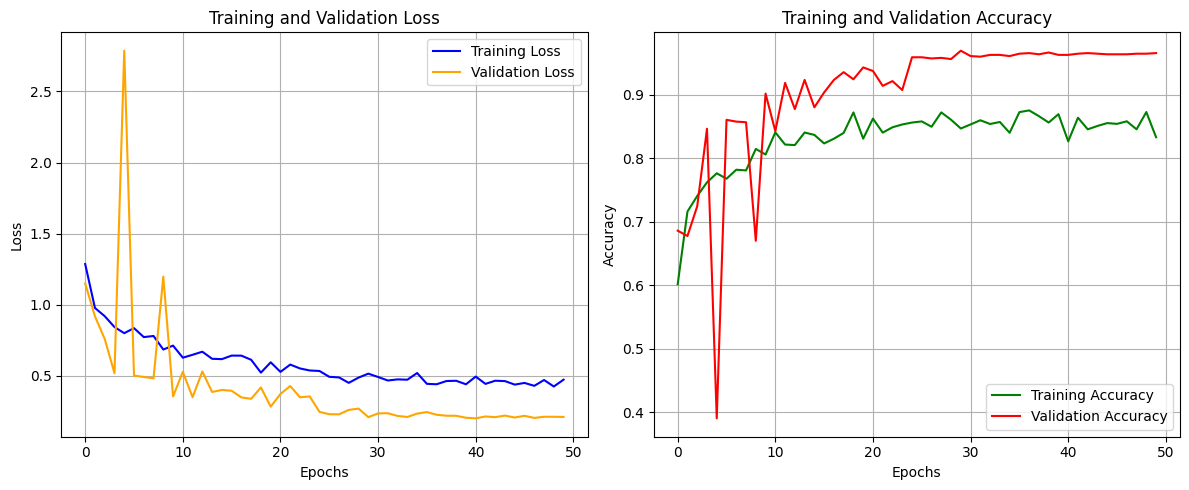

In [ ]:
plot_losses_and_accuracies(train_losses, val_losses, train_accuracies, val_accuracies)

In [ ]:
model.load_state_dict(torch.load('densenet_cutmix_cbam_no_annotation.pth'))
all_labels, all_preds = evaluate_model(model, val_loader)

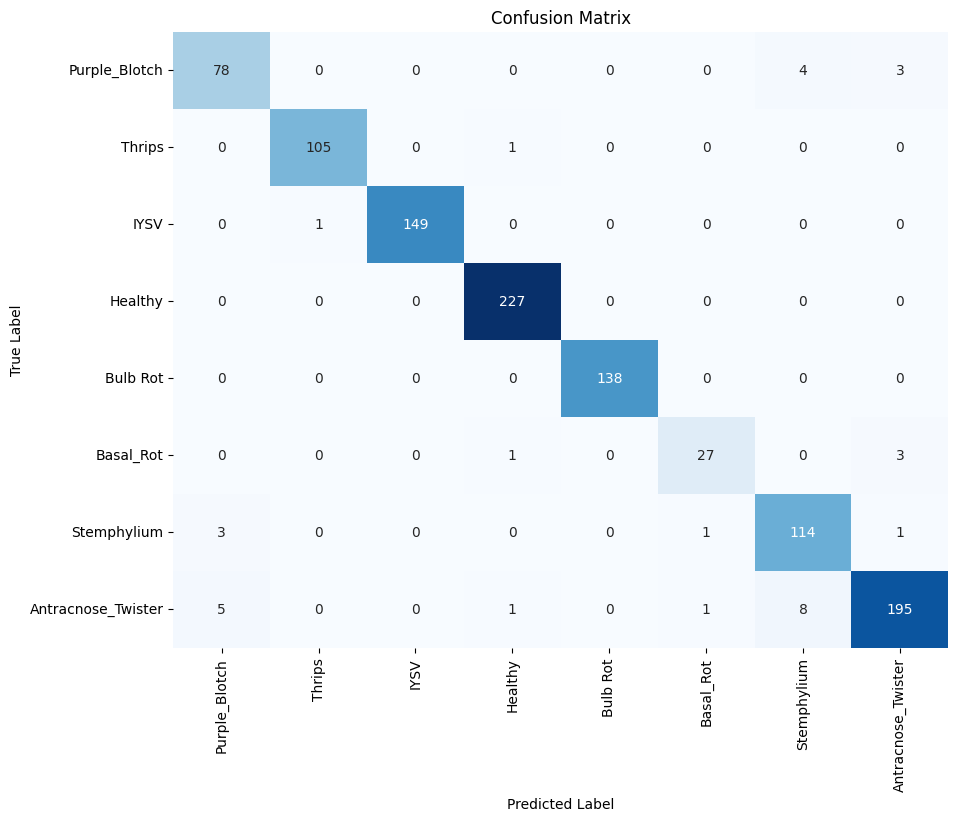

Total Accuracy: 96.90%
Class 'Purple_Blotch' Accuracy: 91.76%
Class 'Thrips' Accuracy: 99.06%
Class 'IYSV' Accuracy: 99.33%
Class 'Healthy' Accuracy: 100.00%
Class 'Bulb Rot' Accuracy: 100.00%
Class 'Basal_Rot' Accuracy: 87.10%
Class 'Stemphylium' Accuracy: 95.80%
Class 'Antracnose_Twister' Accuracy: 92.86%


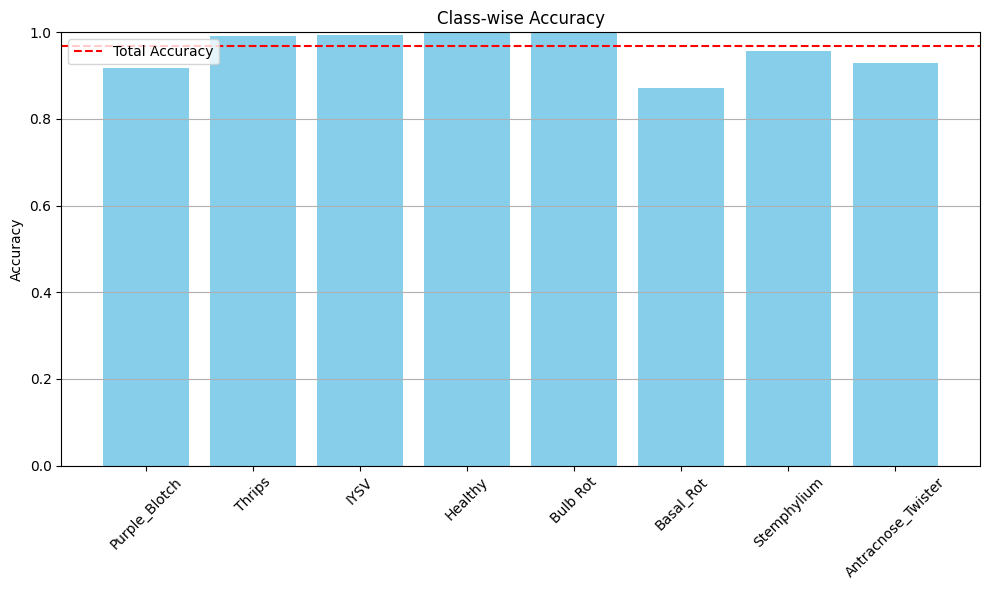

In [ ]:
class_names = list(jpg_paths_comb_dict.keys()) 
cm = confusion_matrix(all_labels, all_preds)
num_classes=len(jpg_paths_comb_dict)
plot_confusion_matrix(cm, num_classes, class_names)
plot_classwise_accuracy(cm, jpg_paths_comb_dict)

In [87]:
model.load_state_dict(torch.load('densenet_cutmix_cbam_no_annotation.pth'))
model.to(device)
model.eval()

DenseNet121WithCBAM(
  (base): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace=True)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu1): ReLU(inplace=True)
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu2): ReLU(inplace=True)
          (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        )
        (denselayer2): _DenseLayer(
          (norm1): BatchNorm2d(96, eps=1e-05, mom

In [ ]:
def evaluate_model(model, dataloader):
    all_preds, all_labels, all_images = [], [], []

    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            preds = torch.argmax(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_images.extend(images.cpu()) 

    return all_images, all_labels, all_preds


In [89]:
def get_gradcam(model, image_tensor, target_class, target_layer):
    model.eval()
    gradients = []
    activations = []

    def save_gradients_hook(module, grad_input, grad_output):
        gradients.append(grad_output[0])

    def save_activation_hook(module, input, output):
        activations.append(output)

    handle_activation = target_layer.register_forward_hook(save_activation_hook)
    handle_gradient = target_layer.register_backward_hook(save_gradients_hook)

    output = model(image_tensor.unsqueeze(0).to(device))
    model.zero_grad()
    class_loss = output[0, target_class]
    class_loss.backward()

    grads = gradients[0].squeeze(0).detach().cpu().numpy()
    acts = activations[0].squeeze(0).detach().cpu().numpy()

    weights = np.mean(grads, axis=(1, 2))
    cam = np.zeros(acts.shape[1:], dtype=np.float32)

    for i, w in enumerate(weights):
        cam += w * acts[i, :, :]

    cam = np.maximum(cam, 0)
    cam = cv2.resize(cam, (224, 224))
    cam -= cam.min()
    cam /= cam.max()

    handle_activation.remove()
    handle_gradient.remove()

    return cam


In [90]:
def show_cam_on_image(img_tensor, mask, title):
    img = img_tensor.permute(1, 2, 0).numpy()
    img -= img.min()
    img /= img.max()
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap + img
    overlayed /= overlayed.max()

    plt.imshow(overlayed)
    plt.title(title)
    plt.axis('off')


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment


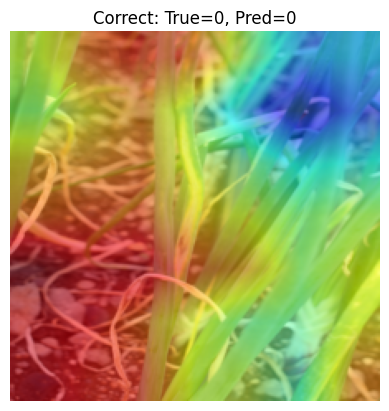

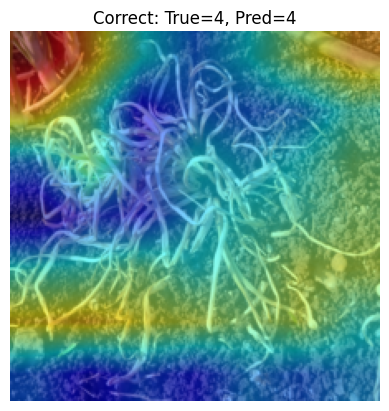

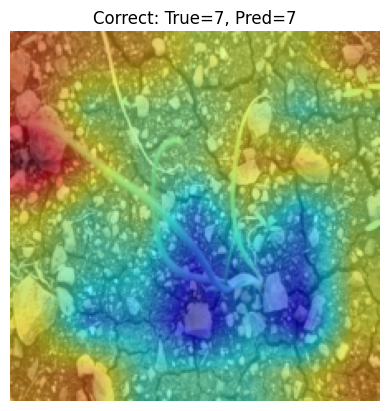

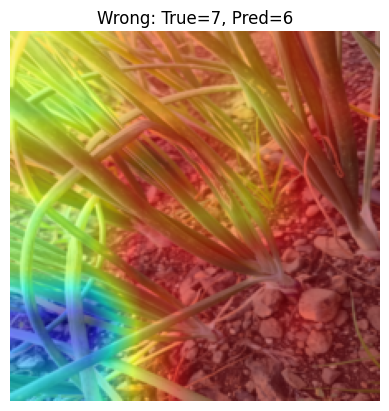

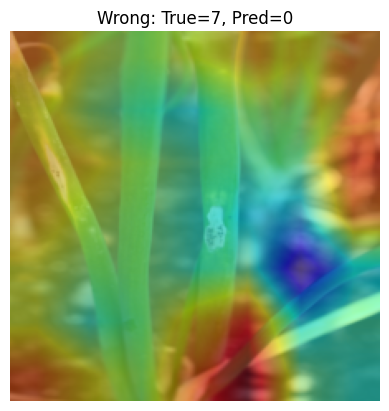

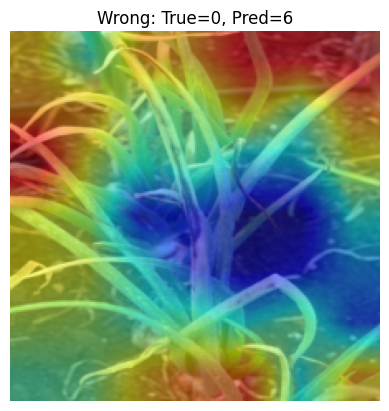

In [ ]:
from random import sample

images, labels, preds = evaluate_model(model, val_loader)

correct = [(img, lbl, pred) for img, lbl, pred in zip(images, labels, preds) if lbl == pred]
wrong = [(img, lbl, pred) for img, lbl, pred in zip(images, labels, preds) if lbl != pred]

target_layer = model.features.norm5    
for img, lbl, pred in sample(correct, 3):
    cam = get_gradcam(model, img.to(device), pred, target_layer)
    show_cam_on_image(img, cam, f"Correct: True={lbl}, Pred={pred}")
    plt.show()

for img, lbl, pred in sample(wrong, 3):
    cam = get_gradcam(model, img.to(device), pred, target_layer)
    show_cam_on_image(img, cam, f"Wrong: True={lbl}, Pred={pred}")
    plt.show()


In [ ]:
def show_gradcam_side_by_side(img_tensor, cam, true_label, pred_label, class_names):
    img = img_tensor.permute(1, 2, 0).numpy()
    img -= img.min()
    img /= img.max()

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap + img
    overlayed /= overlayed.max()

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    fig.subplots_adjust(wspace=0.05)  

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(overlayed)
    axs[1].set_title(f"Grad-CAM\nTrue: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    axs[1].axis('off')

    plt.tight_layout(pad=1.0)  
    plt.show()


In [ ]:
def show_gradcam_side_by_side(img_tensor, cam, true_label, pred_label, class_names):
    img = img_tensor.permute(1, 2, 0).numpy()
    img -= img.min()
    img /= img.max()
    
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap + img
    overlayed /= overlayed.max()

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(overlayed)
    axs[1].set_title(f"Grad-CAM\nTrue: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    axs[1].axis('off')

    plt.tight_layout()
    plt.show()


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f72ab437790>
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1479, in __del__
    self._shutdown_workers()
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1437, in _shutdown_workers
    if self._persistent_workers or self._workers_status[worker_id]:
AttributeError: '_MultiProcessingDataLoaderIter' object has no attribute '_workers_status'
Exception ignored in: <function _ConnectionBase.__del__ at 0x7f72aba518b0>
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/multiprocessing/connection.py", line 132, in __del__
Traceback (most recent call last):
  File "/raid/ee-mariyam/maryam/miniconda3/envs/abhijeet/lib/python3.8/multiprocessing/queues.py", line 235, in _feed
    close(

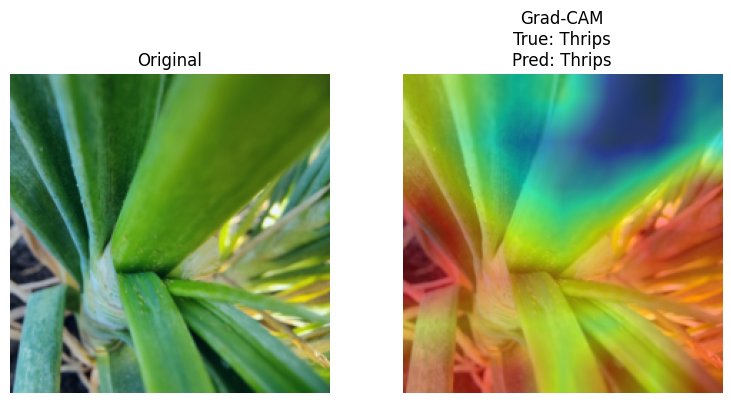

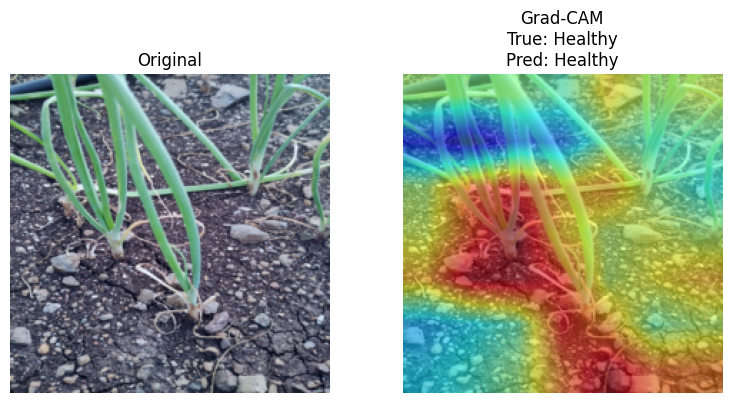

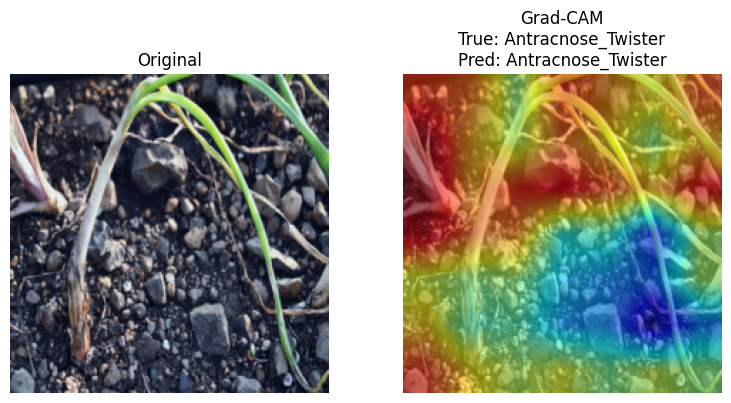

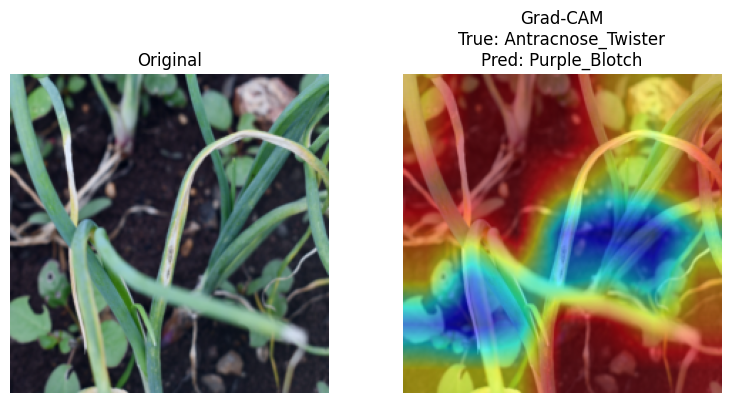

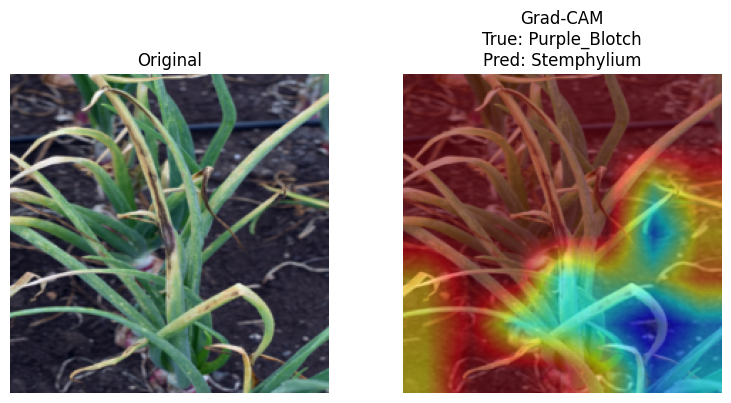

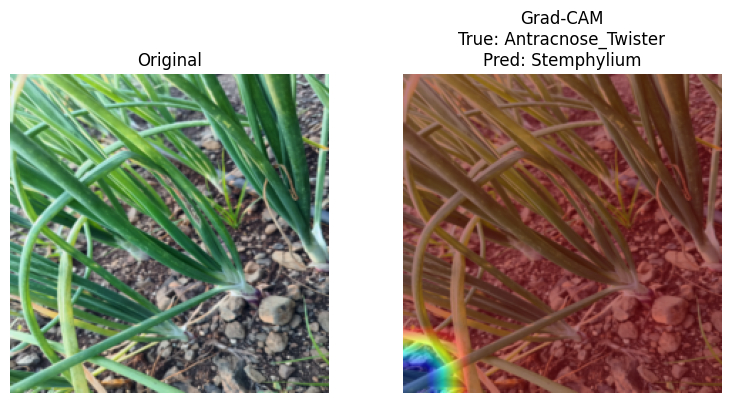

In [ ]:
class_names = [None] * len(dataset.label_map)
for class_name, idx in dataset.label_map.items():
    class_names[idx] = class_name

for img, lbl, pred, in sample(correct, 3):
    cam = get_gradcam(model, img.to(device), pred, target_layer)
    show_gradcam_side_by_side(img, cam, lbl, pred, class_names)

for img, lbl, pred in sample(wrong, 3):
    cam = get_gradcam(model, img.to(device), pred, target_layer)
    show_gradcam_side_by_side(img, cam, lbl, pred, class_names)


In [ ]:
def show_gradcam_side_by_side(img_tensor, cam, true_label, pred_label, class_names):
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    img -= img.min()
    img /= img.max()

    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap + img
    overlayed /= overlayed.max()

    fig, axs = plt.subplots(1, 2, figsize=(4, 4))
    
    fig.subplots_adjust(wspace=0.0)  
    
    axs[0].imshow(img)
    axs[0].set_title("Original")
    axs[0].axis('off')

    axs[1].imshow(overlayed)
    axs[1].set_title(f"Grad-CAM\nTrue: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    axs[1].axis('off')

    plt.tight_layout(pad=1.0)  
    plt.show()


In [ ]:
def show_gradcam_side_by_side_inverted(img_tensor, cam, true_label, pred_label, class_names):
    img = img_tensor.permute(1, 2, 0).cpu().numpy()
    img -= img.min()
    img /= img.max()

    inverted_cam = 1 - cam

    heatmap = cv2.applyColorMap(np.uint8(255 * inverted_cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    overlayed = heatmap + img
    overlayed /= overlayed.max()

    import matplotlib.gridspec as gridspec

    fig = plt.figure(figsize=(4, 4))
    gs = gridspec.GridSpec(1, 2, wspace=0.0)

    ax0 = fig.add_subplot(gs[0])
    ax0.imshow(img)
    ax0.set_title("Original")
    ax0.axis('off')

    ax1 = fig.add_subplot(gs[1])
    ax1.imshow(overlayed)
    ax1.set_title(f"Grad-CAM\nTrue: {class_names[true_label]}\nPred: {class_names[pred_label]}")
    ax1.axis('off')

    plt.show()


Correct example for class: IYSV


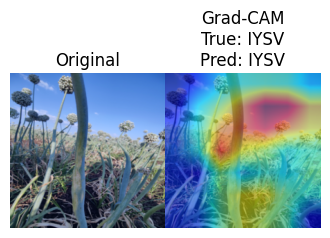

Correct example for class: Thrips


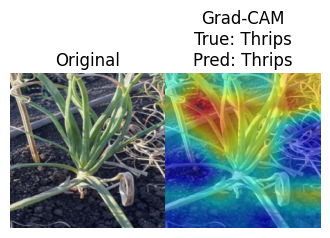

Correct example for class: Healthy


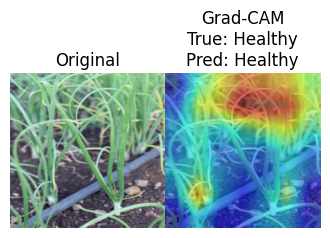

Correct example for class: Antracnose_Twister


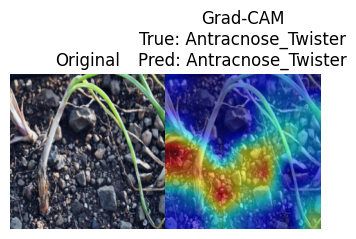

Correct example for class: Bulb Rot


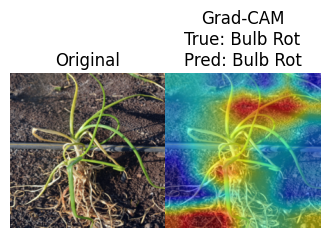

Correct example for class: Stemphylium


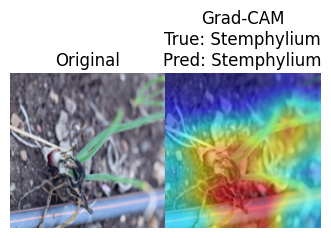

Correct example for class: Purple_Blotch


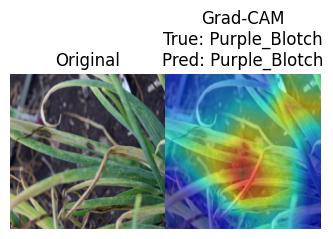

Correct example for class: Basal_Rot


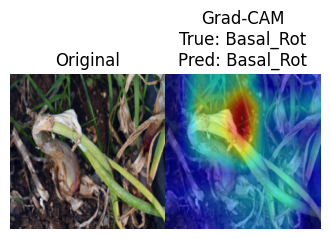

Incorrect example for class: Antracnose_Twister


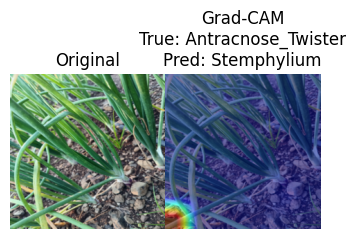

Incorrect example for class: Purple_Blotch


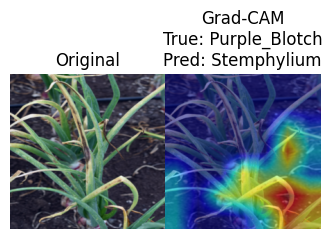

In [ ]:
import random
from collections import defaultdict

def show_one_per_class(samples, class_names, model, target_layer, device, correct=True):
    """
    Show one Grad-CAM example per class from samples (correct or incorrect).
    Randomly picks different images each time.
    """
    seen = set()
    samples_shuffled = samples.copy()
    random.shuffle(samples_shuffled) 

    for sample in samples_shuffled:
        if len(sample) == 4:
            img, lbl, pred, _ = sample
        else:
            img, lbl, pred = sample
        
        if lbl not in seen:
            seen.add(lbl)
            cam = get_gradcam(model, img.to(device), pred, target_layer)
            title = "Correct" if correct else "Incorrect"
            print(f"{title} example for class: {class_names[lbl]}")
            show_gradcam_side_by_side_inverted(img, cam, lbl, pred, class_names)
        
        if len(seen) == len(class_names):
            break


show_one_per_class(correct, class_names, model, target_layer, device, correct=True)

show_one_per_class(wrong, class_names, model, target_layer, device, correct=False)


In [ ]:
class_names = list(jpg_paths_comb_dict.keys())
print("Class names in order:", class_names)

class_to_idx = {cls_name: i for i, cls_name in enumerate(class_names)}
idx_to_class = {i: cls_name for i, cls_name in enumerate(class_names)}

for i in range(5):
    _, label = dataset[i]
    print(f"Sample index {i} has label {label} which maps to class '{idx_to_class[label]}'")


Class names in order: ['Purple_Blotch', 'Thrips', 'IYSV', 'Healthy', 'Bulb Rot', 'Basal_Rot', 'Stemphylium', 'Antracnose_Twister']
Sample index 0 has label 0 which maps to class 'Purple_Blotch'
Sample index 1 has label 0 which maps to class 'Purple_Blotch'
Sample index 2 has label 0 which maps to class 'Purple_Blotch'
Sample index 3 has label 0 which maps to class 'Purple_Blotch'
Sample index 4 has label 0 which maps to class 'Purple_Blotch'


In [52]:
dataset.label_map

{'Purple_Blotch': 0,
 'Thrips': 1,
 'IYSV': 2,
 'Healthy': 3,
 'Bulb Rot': 4,
 'Basal_Rot': 5,
 'Stemphylium': 6,
 'Antracnose_Twister': 7}

Incorrect example for class: Purple_Blotch


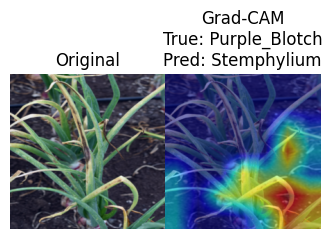

Incorrect example for class: Antracnose_Twister


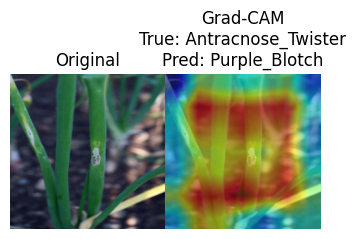

Incorrect example for class: Antracnose_Twister


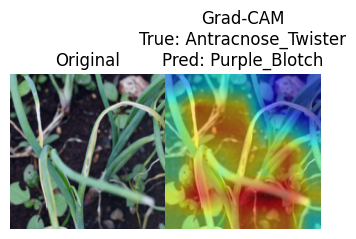

Incorrect example for class: Purple_Blotch


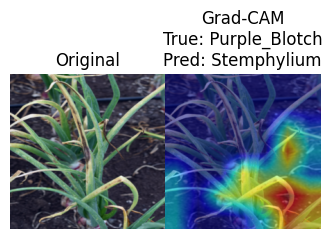

Incorrect example for class: Antracnose_Twister


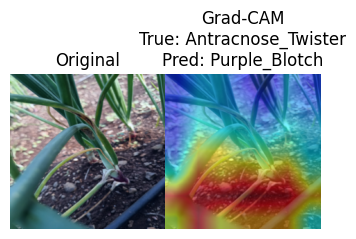

Incorrect example for class: Purple_Blotch


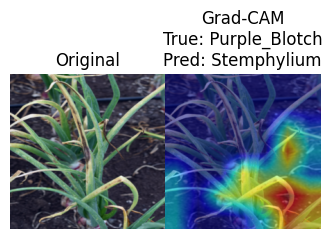

Incorrect example for class: Purple_Blotch


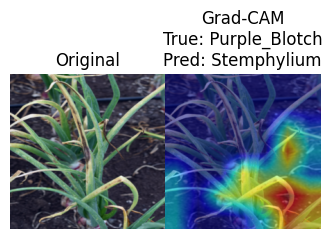

Incorrect example for class: Antracnose_Twister


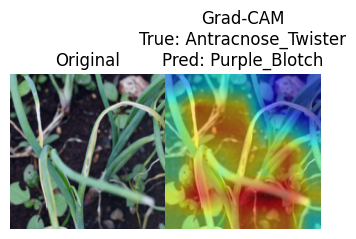

In [124]:
show_one_per_class(wrong, class_names, model, target_layer, device, correct=False)
show_one_per_class(wrong, class_names, model, target_layer, device, correct=False)
show_one_per_class(wrong, class_names, model, target_layer, device, correct=False)
show_one_per_class(wrong, class_names, model, target_layer, device, correct=False)
